In [176]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import math
import warnings

In [177]:
df = pd.read_csv("/Users/chuanjiewu/Downloads/application_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [178]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [179]:
df[df.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


In [180]:
df.CODE_GENDER.value_counts()

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

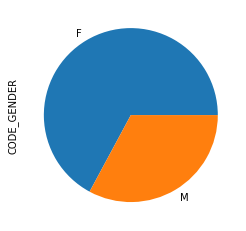

In [181]:
g1=df.CODE_GENDER.value_counts()
g1.plot.pie()
plt.show()

In [182]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

<AxesSubplot:>

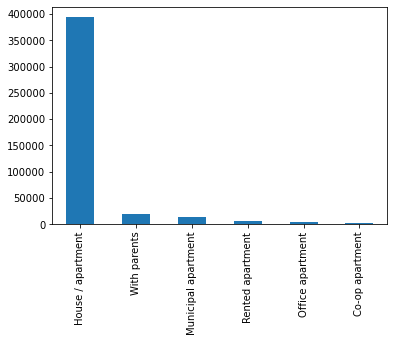

In [183]:
h1=df.NAME_HOUSING_TYPE.value_counts()
h1.plot.bar()

In [184]:
df.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID':'count'})

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [185]:
# calculate housing ownership percent

c1=df.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID':'count'})
c1.apply(lambda x: x/x.sum()*100)

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.196554
            House / apartment    61.019890
            Municipal apartment   2.284538
            Office apartment      0.483860
            Rented apartment      0.748819
            With parents          2.404705
M           Co-op apartment       0.154370
            House / apartment    28.781664
            Municipal apartment   0.956546
            Office apartment      0.410437
            Rented apartment      0.613375
            With parents          1.945243

<AxesSubplot:xlabel='CODE_GENDER,NAME_HOUSING_TYPE'>

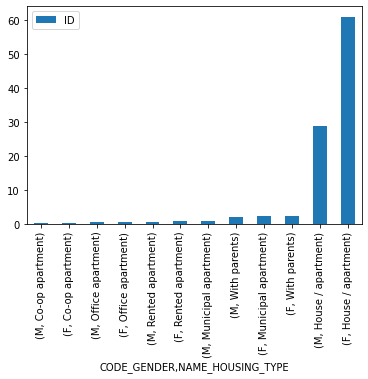

In [186]:
c2=c1.apply(lambda x: x/x.sum()*100)
c2.sort_values(by = 'ID').plot.bar()
# Females applicants have higher house ownership percentage.

In [187]:
df.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.mean().sort_values()


NAME_EDUCATION_TYPE
Lower secondary                  143933.865218
Secondary / secondary special    172056.654071
Incomplete higher                207331.018315
Higher education                 226106.872502
Academic degree                  240692.307692
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

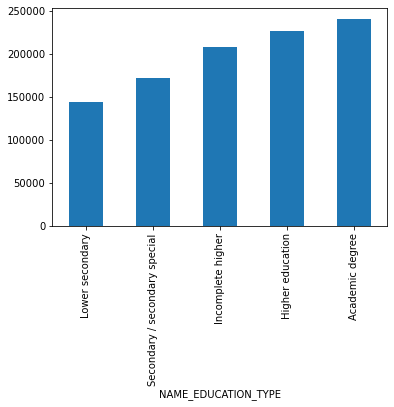

In [188]:
e1=df.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.mean().sort_values()
e1.plot.bar()

In [189]:
df2= pd.read_csv("/Users/chuanjiewu/Downloads/credit_record.csv")
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


<AxesSubplot:>

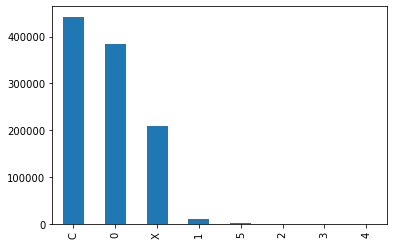

In [191]:
df2.STATUS.value_counts().plot.bar()

<AxesSubplot:>

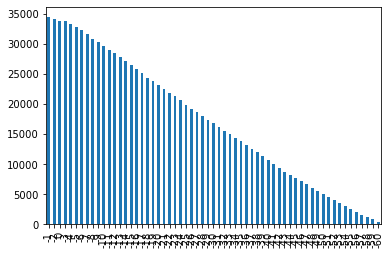

In [192]:
df2.MONTHS_BALANCE.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

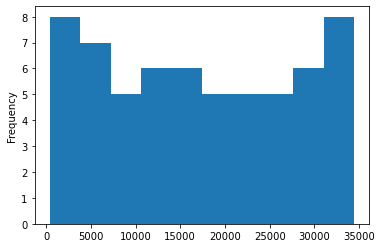

In [193]:
df2.MONTHS_BALANCE.value_counts().plot.hist()

In [194]:
# df3=df2.groupby('ID').agg({'MONTHS_BALANCE':min})
# # df3=df3.apply(lambda x: x*(-1))
# # df3.head()
# df3
df2['MONTHS_BALANCE'] = df2.MONTHS_BALANCE.apply(lambda x : x*(-1))
df3 = pd.DataFrame(df2.groupby('ID').agg({'MONTHS_BALANCE' : max}))
df3.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'}, inplace =True)
df3.head()

,CUST_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


In [195]:
# merge df3 with df1
df4=pd.merge(df, df3, on = 'ID', how = 'inner')
df4.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [196]:
df2['STATUS'][df2["STATUS"] == 'C'] = -1
df2['STATUS'][df2["STATUS"] == 'X'] = -1
df2.head()

<ipython-input-196-cd92957272b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['STATUS'][df2["STATUS"] == 'C'] = -1
<ipython-input-196-cd92957272b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['STATUS'][df2["STATUS"] == 'X'] = -1


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [197]:
# assume customer did not pay for more than 60 days is considered as defaulter
df2['STATUS']=df2.STATUS.apply(lambda x: int(x))
df2.sort_values(by = 'STATUS', ascending= False, inplace = True)
df2.drop_duplicates(subset='ID', inplace = True)
df2['target']=df2.STATUS.apply(lambda x: 0 if x > 2 else 1)
df2.head()
df2.drop(['MONTHS_BALANCE','STATUS'],axis = 1, inplace = True)

In [198]:
df2.target.value_counts()

1    45654
0      331
Name: target, dtype: int64

In [199]:
mdf =pd.merge(df4, df2, on = 'ID', how = 'inner')
mdf.head()
mdf.shape

(36457, 20)

In [200]:
mdf.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'],
      dtype='object')

In [201]:
mdf.drop_duplicates(subset =['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'], inplace = True)

mdf.shape

(32146, 20)

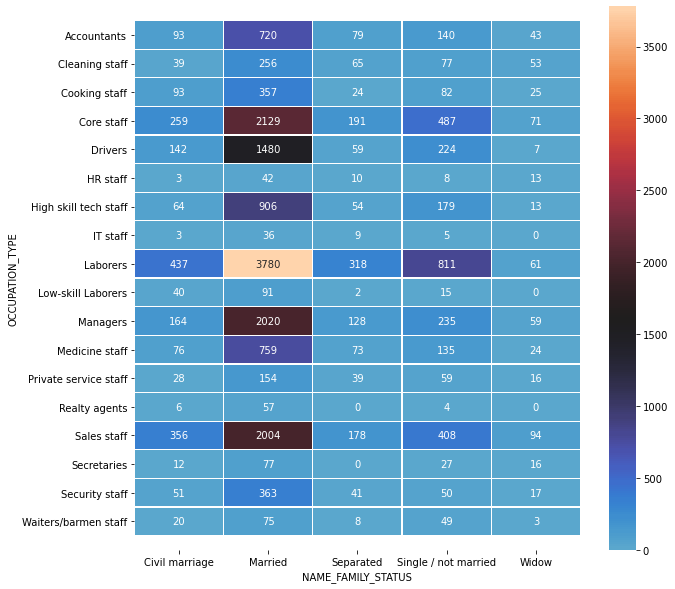

In [202]:
# check multilinearity among variables on default
pvt_tbl = pd.pivot_table(data = mdf, index = ['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


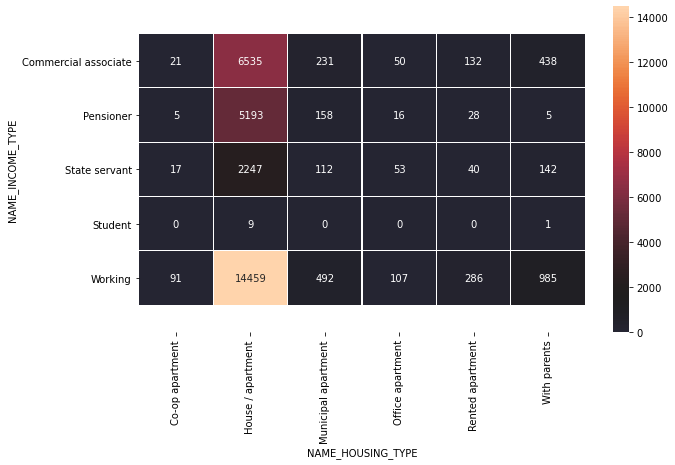

In [203]:
pvt_tbl = pd.pivot_table(data = mdf, index = ['NAME_INCOME_TYPE'], columns = ['NAME_HOUSING_TYPE'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,6])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [204]:
# Convert binary categorical columns to have integer value
mdf['CODE_GENDER'] = mdf.CODE_GENDER.apply(lambda x : 0 if x == 'M' else 1)
mdf['FLAG_OWN_CAR'] = mdf.FLAG_OWN_CAR.apply(lambda x : 0 if x == 'N' else 1)
mdf['FLAG_OWN_REALTY'] = mdf.FLAG_OWN_REALTY.apply(lambda x : 0 if x == 'N' else 1)
mdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [205]:
# every one has mobil so the feature can be droped
mdf.drop('FLAG_MOBIL', axis = 1, inplace = True)
mdf.CNT_FAM_MEMBERS=mdf.CNT_FAM_MEMBERS.astype(int)

In [206]:
def box_plot(df,col) :
    sns.boxplot(data = df, y = col)
    plt.show()
mdf

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36451,5149775,1,1,1,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,0,1,0,Laborers,2,19,1
36452,5149828,0,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2,11,0
36453,5149834,1,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2,23,0
36454,5149838,1,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2,32,0


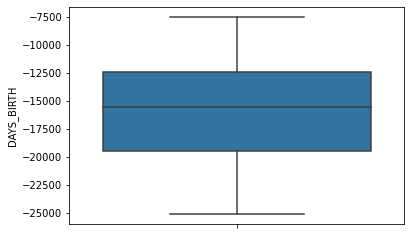

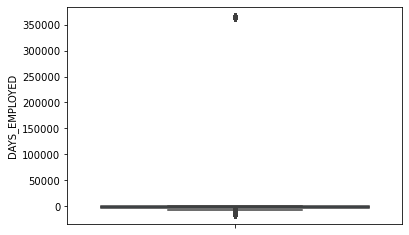

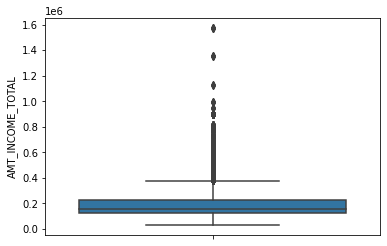

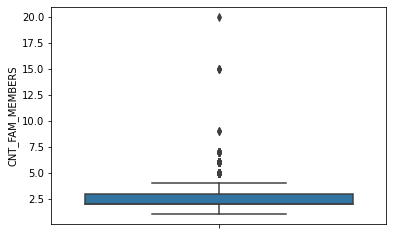

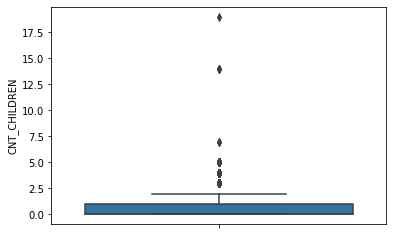

In [207]:

# boxplt_col = ["DAYS_BIRTH","DAYS_EMPLOYED","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","CNT_CHILDREN"]

box_plot(mdf,'DAYS_BIRTH')
box_plot(mdf,'DAYS_EMPLOYED')
box_plot(mdf,'AMT_INCOME_TOTAL')
box_plot(mdf,'CNT_FAM_MEMBERS')
box_plot(mdf,'CNT_CHILDREN')

# diagnoise outliers
   

In [208]:
mdf[mdf['DAYS_EMPLOYED']>0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
7,5008812,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,20,1
8,5008813,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,16,1
9,5008814,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,17,1
69,5008884,1,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,0,0,0,NaN,1,40,1
150,5008974,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,1,0,0,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21244,365243,0,0,0,NaN,2,28,0
36418,5139446,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21256,365243,0,1,0,NaN,1,16,1
36432,5145690,1,0,1,0,306000.0,Pensioner,Higher education,Married,House / apartment,-21590,365243,0,0,0,NaN,2,17,0
36434,5145817,1,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22011,365243,0,0,0,NaN,2,39,0


In [209]:
def convert_to_positive(df,column) :
    df[column] = df[column].apply(lambda x : x*-1)
    return df
mdf[(mdf['DAYS_EMPLOYED'] > 0) & (mdf.NAME_INCOME_TYPE == 'Pensioner')].shape

(5458, 19)

In [210]:
continuous_variable = ['DAYS_BIRTH','DAYS_EMPLOYED']
for c in continuous_variable :
    mdf = convert_to_positive(mdf,c)
mdf.shape


(32146, 19)

In [211]:
mdf[mdf['DAYS_BIRTH']<0].shape

(0, 19)

In [212]:
mdf['EMP_YEARS'] = mdf.DAYS_EMPLOYED/365
mdf['AGE'] = mdf.DAYS_BIRTH/365
mdf.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)
mdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,15,1,12.443836,32.890411
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,14,1,12.443836,32.890411
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,1,3.106849,58.832877
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,1,8.358904,52.356164
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,1,8.358904,52.356164


In [213]:
mdf['EMP_YEARS'] = mdf.EMP_YEARS.apply(lambda x: -1 if x<0 else x)

In [214]:
#calculate porportion of default in each feature 
def bad_cust_proportion(col) :
    bad_prop_cnt = mdf.groupby([col,'target']).agg({'ID': 'count'})
    bad_prop_percent = bad_prop_cnt.groupby(level=0).apply(lambda x:100 * x /float(x.sum()))
    return bad_prop_percent



In [215]:
bad_cust_proportion('FLAG_OWN_CAR')
# people own a car has lower probability default


ID
FLAG_OWN_CAR target           
0            0        0.951427
             1       99.048573
1            0        0.845926
             1       99.154074

In [216]:
bad_cust_proportion('NAME_HOUSING_TYPE')
# people living in coop apartment has highest prob of defaulting

ID
NAME_HOUSING_TYPE   target           
Co-op apartment     0        2.189781
                    1       97.810219
House / apartment   0        0.874747
                    1       99.125253
Municipal apartment 0        2.167488
                    1       97.832512
Office apartment    0        1.739130
                    1       98.260870
Rented apartment    0        1.018330
                    1       98.981670
With parents        0        0.506650
                    1       99.493350

In [218]:
bad_cust_proportion('NAME_FAMILY_STATUS')

# signle and separated customer has higher prob of defaulting compared to married

ID
NAME_FAMILY_STATUS   target           
Civil marriage       0        0.305694
                     1       99.694306
Married              0        0.865703
                     1       99.134297
Separated            0        1.400862
                     1       98.599138
Single / not married 0        1.175917
                     1       98.824083
Widow                0        1.325479
                     1       98.674521

In [219]:

mdf['OCCUPATION_TYPE'] = mdf.OCCUPATION_TYPE.apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)
mdf.OCCUPATION_TYPE.value_counts()

UNEMPLOYED               9969
Laborers                 5454
Core staff               3184
Sales staff              3060
Managers                 2626
Drivers                  1925
High skill tech staff    1229
Accountants              1082
Medicine staff           1073
Cooking staff             586
Security staff            530
Cleaning staff            493
Private service staff     296
Waiters/barmen staff      157
Low-skill Laborers        150
Secretaries               134
HR staff                   76
Realty agents              67
IT staff                   55
Name: OCCUPATION_TYPE, dtype: int64

In [220]:
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = mdf[col].unique()
    df.set_index('values',inplace = True)
    
    values = mdf[col].unique()
    total_dict = dict(mdf.groupby(col).size())
    col_target_dict = dict(mdf.groupby([col,'target']).size())
    target_count = dict(mdf.groupby(['target']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['good'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['good']/df['total']
    df['non_event_rate'] = df['bad']/df['total']
    
    df['per_total_events'] = df['good']/target_count[1]
    df['per_total_non_events'] = df['bad']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_events.astype('float64')/df.per_total_non_events.astype('float64'))
    df['IV'] = (df['per_total_events'] - df['per_total_non_events']) * df['WOE']
    
    return df    

In [221]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])
iv_values['col_name'] = mdf.columns
iv_values.set_index(['col_name'],inplace = True)
iv_values.drop(['ID','target'],inplace = True)
iv_values

,iv_value
col_name,
CODE_GENDER,NaN
FLAG_OWN_CAR,NaN
FLAG_OWN_REALTY,NaN
CNT_CHILDREN,NaN
AMT_INCOME_TOTAL,NaN
NAME_INCOME_TYPE,NaN
NAME_EDUCATION_TYPE,NaN
NAME_FAMILY_STATUS,NaN
NAME_HOUSING_TYPE,NaN


In [222]:
# First we talk about binary variable: gender, whether own a car, whether own property, whether has work phone, whether haspersonal phone, whether has email 
# CODE_GENDER
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
CODE_GENDER_df

iv_value    0.010376
Name: CODE_GENDER, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,10627,10516,111,0.989555,0.010445,0.330142,0.37884,-0.137591,0.0067
1,21519,21337,182,0.991542,0.008458,0.669858,0.62116,0.075477,0.003676


In [223]:
# FLAG_OWN_CAR
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
FLAG_OWN_CAR_df

iv_value    0.00326
Name: FLAG_OWN_CAR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,12176,12073,103,0.991541,0.008459,0.379022,0.351536,0.075284,0.002069
0,19970,19780,190,0.990486,0.009514,0.620978,0.648464,-0.043312,0.00119


In [224]:
# FLAG_OWN_REALTY
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

iv_value    0.031078
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,21578,21406,172,0.992029,0.007971,0.672025,0.587031,0.135218,0.011493
0,10568,10447,121,0.98855,0.01145,0.327975,0.412969,-0.230435,0.019586


In [225]:
# FLAG_WORK_PHONE
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
FLAG_WORK_PHONE_df

iv_value    0.001056
Name: FLAG_WORK_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,7243,7173,70,0.990335,0.009665,0.225191,0.238908,-0.059130,0.000811
0,24903,24680,223,0.991045,0.008955,0.774809,0.761092,0.017862,0.000245


In [226]:
# FLAG_PHONE
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
FLAG_PHONE_df

iv_value    0.007273
Name: FLAG_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22655,22460,195,0.991393,0.008607,0.705114,0.665529,0.057777,0.002287
1,9491,9393,98,0.989674,0.010326,0.294886,0.334471,-0.125962,0.004986


In [227]:
# FLAG_EMAIL
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
FLAG_EMAIL_df

iv_value    0.000968
Name: FLAG_EMAIL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,29254,28990,264,0.990976,0.009024,0.910118,0.901024,0.010043,0.000091
1,2892,2863,29,0.989972,0.010028,0.089882,0.098976,-0.096385,0.000877


In [228]:
# category variable: income type, education type, family status, housing type, occupation type
# NAME_INCOME_TYPE
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

iv_value    0.052403
Name: NAME_INCOME_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,16544,16420,124,0.992505,0.007495,0.515493,0.423208,0.197260,0.018204
Commercial associate,7487,7407,80,0.989315,0.010685,0.232537,0.273038,-0.160560,0.006503
Pensioner,5475,5405,70,0.987215,0.012785,0.169686,0.238908,-0.342130,0.023683
State servant,2630,2611,19,0.992776,0.007224,0.08197,0.064846,0.234335,0.004013


In [229]:
# NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
NAME_EDUCATION_TYPE_df

iv_value    0.032252
Name: NAME_EDUCATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Higher education,8663,8575,88,0.989842,0.010158,0.269205,0.300341,-0.109445,0.003408
Secondary / secondary special,21873,21693,180,0.991771,0.008229,0.681035,0.614334,0.103074,0.006875
Incomplete higher,1250,1232,18,0.9856,0.0144,0.038678,0.061433,-0.462692,0.010529
Lower secondary,335,328,7,0.979104,0.020896,0.010297,0.023891,-0.841611,0.01144


In [230]:
# NAME_FAMILY_STATUS
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

iv_value    0.092697
Name: NAME_FAMILY_STATUS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Civil marriage,2617,2609,8,0.996943,0.003057,0.081908,0.027304,1.098567,0.059986
Married,22063,21872,191,0.991343,0.008657,0.686654,0.651877,0.051975,0.001808
Single / not married,4252,4202,50,0.988241,0.011759,0.131919,0.170648,-0.257421,0.00997
Separated,1856,1830,26,0.985991,0.014009,0.057451,0.088737,-0.434740,0.013601
Widow,1358,1340,18,0.986745,0.013255,0.042068,0.061433,-0.378661,0.007333


In [231]:
# NAME_HOUSING_TYPE
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
NAME_HOUSING_TYPE_df

iv_value    0.062982
Name: NAME_HOUSING_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Rented apartment,491,486,5,0.989817,0.010183,0.015258,0.017065,-0.111944,0.000202
House / apartment,28694,28443,251,0.991253,0.008747,0.892946,0.856655,0.041490,0.001506
Municipal apartment,1015,993,22,0.978325,0.021675,0.031174,0.075085,-0.879026,0.038599
With parents,1579,1571,8,0.994934,0.005066,0.04932,0.027304,0.591312,0.013019
Co-op apartment,137,134,3,0.978102,0.021898,0.004207,0.010239,-0.889487,0.005365
Office apartment,230,226,4,0.982609,0.017391,0.007095,0.013652,-0.654474,0.004291


In [232]:
# OCCUPATION_TYPE
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
OCCUPATION_TYPE_df

iv_value    0.076632
Name: OCCUPATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
UNEMPLOYED,9969,9873,96,0.99037,0.00963,0.309955,0.327645,-0.055503,0.000982
Security staff,530,522,8,0.984906,0.015094,0.016388,0.027304,-0.510488,0.005572
Sales staff,3060,3040,20,0.993464,0.006536,0.095438,0.068259,0.335166,0.009109
Accountants,1082,1075,7,0.99353,0.00647,0.033749,0.023891,0.345452,0.003405
Laborers,5454,5407,47,0.991382,0.008618,0.169749,0.16041,0.056588,0.000528
Managers,2626,2606,20,0.992384,0.007616,0.081813,0.068259,0.181125,0.002455
Drivers,1925,1912,13,0.993247,0.006753,0.060026,0.044369,0.302241,0.004732
Core staff,3184,3137,47,0.985239,0.014761,0.098484,0.16041,-0.487840,0.03021
High skill tech staff,1229,1216,13,0.989422,0.010578,0.038175,0.044369,-0.150342,0.000931


In [234]:
mdf.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
count,3.214600e+04,32146.000000,32146.000000,32146.000000,32146.000000,3.214600e+04,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000
mean,5.078186e+06,0.669415,0.378772,0.671250,0.431251,1.858567e+05,0.225316,0.295247,0.089965,2.199341,26.061563,0.990885,5.836651,43.774795
std,4.181192e+04,0.470431,0.485089,0.469766,0.745653,1.007514e+05,0.417797,0.456161,0.286135,0.914388,16.462280,0.095036,6.652358,11.545757
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,20.517808
25%,5.041916e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000,1.098630,34.120548
50%,5.074712e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,24.000000,1.000000,4.216438,42.649315
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,39.000000,1.000000,8.605479,53.317808
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000,43.049315,68.909589


In [237]:
# in order to ensure each bin has more than 5% observation, we divide 'cnt_child_category' variable into 3 parts, 0, 1, or more than 1
mdf['cnt_child_category'] = mdf.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))
CNT_CHILDREN_df = calc_woe_iv('cnt_child_category')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
CNT_CHILDREN_df

iv_value    0.004839
Name: CNT_CHILDREN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22214,22004,210,0.990547,0.009453,0.690798,0.716724,-0.036842,0.000955
1,6602,6544,58,0.991215,0.008785,0.205444,0.197952,0.037147,0.000278
1+,3330,3305,25,0.992492,0.007508,0.103758,0.085324,0.195602,0.003606


In [238]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
mdf['income_bin'] = pd.cut(mdf['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
mdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,29,1,3.106849,58.832877,0,150000
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,4,1,8.358904,52.356164,0,300000
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,26,1,8.358904,52.356164,0,300000


In [239]:
AMT_INCOME_TOTAL_df = calc_woe_iv('income_bin')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE',inplace = True)
AMT_INCOME_TOTAL_df

iv_value    0.030632
Name: AMT_INCOME_TOTAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
350000,1306,1288,18,0.986217,0.013783,0.040436,0.061433,-0.418240,0.008782
1600000,2028,2005,23,0.988659,0.011341,0.062945,0.078498,-0.220809,0.003434
250000,6013,5952,61,0.989855,0.010145,0.186858,0.208191,-0.108106,0.002306
100000,3111,3081,30,0.990357,0.009643,0.096726,0.102389,-0.056902,0.000322
70000,1411,1398,13,0.990787,0.009213,0.043889,0.044369,-0.010866,0.000005
200000,6825,6765,60,0.991209,0.008791,0.212382,0.204778,0.036459,0.000277
150000,9047,8973,74,0.99182,0.00818,0.2817,0.25256,0.109196,0.003182
300000,2405,2391,14,0.994179,0.005821,0.075064,0.047782,0.451695,0.012323


In [240]:
mdf.CNT_FAM_MEMBERS.value_counts()

2     17153
1      6162
3      5658
4      2744
5       356
6        50
7        17
15        3
9         2
20        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [241]:
# we divided continuous variable family members into 4 types: 1, 2, 3, more than 3
mdf['cnt_family_bin'] = mdf.CNT_FAM_MEMBERS.apply(lambda x : '3+' if x>= 4 else str(x))
CNT_FAM_MEMBERS_df = calc_woe_iv('cnt_family_bin')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE',inplace = True)
CNT_FAM_MEMBERS_df

iv_value    0.021303
Name: CNT_FAM_MEMBERS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,6162,6090,72,0.988315,0.011685,0.191191,0.245734,-0.250977,0.013689
2,17153,17000,153,0.99108,0.00892,0.533702,0.522184,0.021816,0.000251
3,5658,5614,44,0.992223,0.007777,0.176247,0.150171,0.160115,0.004175
3+,3173,3149,24,0.992436,0.007564,0.09886,0.081911,0.188072,0.003188


In [242]:
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
mdf['months_bin'] = pd.cut(mdf['CUST_FOR_MONTHS'], bins = bins,labels = labels)
mdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000,2,1.5
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000,2,1.5
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,29,1,3.106849,58.832877,0,150000,2,2.5
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,4,1,8.358904,52.356164,0,300000,1,0.5
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,26,1,8.358904,52.356164,0,300000,1,2.5


In [243]:
mdf.months_bin.value_counts()

1      4274
0.5    4200
1.5    4094
2      3635
2.5    3452
3.5    3077
3      3045
4      2429
4.5    2210
5      1730
Name: months_bin, dtype: int64

In [244]:
CUST_FOR_MONTHS_df = calc_woe_iv('months_bin')
iv_values.loc['CUST_FOR_MONTHS'] = CUST_FOR_MONTHS_df.IV.sum()
print(iv_values.loc['CUST_FOR_MONTHS'])
CUST_FOR_MONTHS_df.sort_values(by = 'WOE',inplace = True)
CUST_FOR_MONTHS_df

iv_value    0.380087
Name: CUST_FOR_MONTHS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,1730,1686,44,0.974566,0.025434,0.052931,0.150171,-1.042790,0.101401
4,2429,2395,34,0.986002,0.013998,0.075189,0.116041,-0.433936,0.017727
3.5,3077,3034,43,0.986025,0.013975,0.09525,0.146758,-0.432277,0.022266
4.5,2210,2181,29,0.986878,0.013122,0.068471,0.098976,-0.368471,0.01124
3,3045,3011,34,0.988834,0.011166,0.094528,0.116041,-0.205047,0.004411
1.5,4094,4063,31,0.992428,0.007572,0.127555,0.105802,0.186975,0.004067
2.5,3452,3426,26,0.992468,0.007532,0.107557,0.088737,0.192338,0.00362
2,3635,3612,23,0.993673,0.006327,0.113396,0.078498,0.367808,0.012836
1,4274,4253,21,0.995087,0.004913,0.13352,0.071672,0.622143,0.038478


In [246]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
mdf['emp_years_bin'] = pd.cut(mdf['EMP_YEARS'], bins = bins, labels = labels)
mdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,15,1,12.443836,32.890411,0,1600000,2,1.5,15
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,14,1,12.443836,32.890411,0,1600000,2,1.5,15
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,29,1,3.106849,58.832877,0,150000,2,2.5,5
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,4,1,8.358904,52.356164,0,300000,1,0.5,10
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,26,1,8.358904,52.356164,0,300000,1,2.5,10


In [248]:
mdf.emp_years_bin.value_counts()

5          12585
10          7859
retired     5458
15          3265
20+         1531
20          1448
Name: emp_years_bin, dtype: int64

In [249]:
EMP_YEARS_df = calc_woe_iv('emp_years_bin')
iv_values.loc['EMP_YEARS'] = EMP_YEARS_df.IV.sum()
print(iv_values.loc['EMP_YEARS'])
EMP_YEARS_df.sort_values(by = 'WOE',inplace = True)
EMP_YEARS_df

iv_value    0.083482
Name: EMP_YEARS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
retired,5458,5395,63,0.988457,0.011543,0.169372,0.215017,-0.238621,0.010892
5,12585,12445,140,0.988876,0.011124,0.390701,0.477816,-0.201282,0.017535
20+,1531,1520,11,0.992815,0.007185,0.047719,0.037543,0.239856,0.002441
10,7859,7806,53,0.993256,0.006744,0.245063,0.180887,0.303642,0.019486
15,3265,3245,20,0.993874,0.006126,0.101874,0.068259,0.400424,0.01346
20,1448,1442,6,0.995856,0.004144,0.04527,0.020478,0.793313,0.019668


In [250]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
mdf['age_bin'] = pd.cut(mdf['AGE'], bins = bins,labels = labels)
mdf.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,12.443836,32.890411,0,1600000,2,1.5,15,35
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,14,1,12.443836,32.890411,0,1600000,2,1.5,15,35
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,29,1,3.106849,58.832877,0,150000,2,2.5,5,62
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,4,1,8.358904,52.356164,0,300000,1,0.5,10,55
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,26,1,8.358904,52.356164,0,300000,1,2.5,10,55


In [252]:
AGE_df = calc_woe_iv('age_bin')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df.sort_values(by = 'WOE',inplace = True)
AGE_df

iv_value    0.038632
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
70,2213,2184,29,0.986896,0.013104,0.068565,0.098976,-0.367097,0.011164
27,1585,1567,18,0.988644,0.011356,0.049195,0.061433,-0.222168,0.002719
55,3590,3550,40,0.988858,0.011142,0.111449,0.136519,-0.202891,0.005086
30,2798,2771,27,0.99035,0.00965,0.086993,0.09215,-0.057588,0.000297
50,3685,3650,35,0.990502,0.009498,0.114589,0.119454,-0.041580,0.000202
45,4470,4430,40,0.991051,0.008949,0.139076,0.136519,0.018561,0.000047
62,4619,4579,40,0.99134,0.00866,0.143754,0.136519,0.051642,0.000374
40,4713,4679,34,0.992786,0.007214,0.146894,0.116041,0.235765,0.007274
35,4473,4443,30,0.993293,0.006707,0.139485,0.102389,0.309173,0.011469


In [253]:
iv_values.sort_values(by = 'iv_value',ascending=False,inplace = True)
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.380087
NAME_FAMILY_STATUS,0.092697
EMP_YEARS,0.083482
OCCUPATION_TYPE,0.076632
NAME_HOUSING_TYPE,0.062982
NAME_INCOME_TYPE,0.052403
AGE,0.038632
NAME_EDUCATION_TYPE,0.032252
FLAG_OWN_REALTY,0.031078


In [447]:
# show all features 
mdf.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CUST_FOR_MONTHS', 'target', 'EMP_YEARS', 'AGE', 'cnt_child_category',
       'income_bin', 'cnt_family_bin', 'months_bin', 'emp_years_bin',
       'age_bin'],
      dtype='object')

In [510]:
mdf_train = mdf[[ 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                             'OCCUPATION_TYPE', 'CUST_FOR_MONTHS', 'cnt_child_category', 'income_bin', 'cnt_family_bin',
                             'months_bin', 'emp_years_bin', 'age_bin', 'target']]





In [511]:
# create dummy features for category variables
def cdv(df, columns) :
    # Creating a dummy variable for some of the categorical variables and dropping the first one.
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    
    # Adding the results to the master dataframe
    df1 = pd.concat([df, dummy1], axis=1)
    
    #Dropping the initial column
    df1.drop(columns, axis = 1, inplace = True)
    
    return df1

In [512]:
mdf_train = cdv(mdf_train, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                      'OCCUPATION_TYPE', 'cnt_child_category','income_bin', 'cnt_family_bin', 'months_bin',
                      'emp_years_bin', 'age_bin'])

In [513]:
mdf_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32146 entries, 0 to 36456
Data columns (total 77 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   CODE_GENDER                                        32146 non-null  int64
 1   FLAG_OWN_CAR                                       32146 non-null  int64
 2   FLAG_OWN_REALTY                                    32146 non-null  int64
 3   FLAG_WORK_PHONE                                    32146 non-null  int64
 4   FLAG_PHONE                                         32146 non-null  int64
 5   FLAG_EMAIL                                         32146 non-null  int64
 6   CUST_FOR_MONTHS                                    32146 non-null  int64
 7   target                                             32146 non-null  int64
 8   NAME_INCOME_TYPE_Pensioner                         32146 non-null  uint8
 9   NAME_INCOME_TYPE_State serva

In [514]:
mdf_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CUST_FOR_MONTHS,target,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,emp_years_bin_20,emp_years_bin_20+,age_bin_30,age_bin_35,age_bin_40,age_bin_45,age_bin_50,age_bin_55,age_bin_62,age_bin_70
0,0,1,1,1,0,0,15,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,1,0,0,14,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,29,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,1,4,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,1,1,26,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [515]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [516]:
def logistic(df):
    x=df.drop(['target'], axis =1)
    y=df['target']
    xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.7, test_size = 0.3)
    logistic =  sm.GLM(ytrain,(sm.add_constant(xtrain)), family = sm.families.Binomial())
    res = logistic.fit()
    return res


In [517]:
res1= logistic(mdf_train)
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22502
Model:                            GLM   Df Residuals:                    22425
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1062.7
Date:                Wed, 22 Mar 2023   Deviance:                       2125.4
Time:                        01:11:25   Pearson chi2:                 3.65e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                33.4870   4.61e+04      0.001      0.999   -9.03e+04    9.04e+04
CODE_GENDER                                           0.4702      0.185      2.541      0.011       0.107       0.833
FLAG_OWN_CAR                                          0.2315      0.165      1.406      0.160      -0.091       0.554
FLAG_OWN_REALTY                                       0.4376      0.151      2.899      0.004       0.142       0.733
FLAG_WORK_PHONE                                      -0.0631      0.189     -0.334      0.739      -0.434       0.308
FLAG_PHONE                                           -0.2274      0.157     -1.448      0.148      -0.535       0.080
FLAG_EMAIL                                           -0.2092      0.233     -0.898      0.369      -0.666       0.247
CUST_FOR_MONTHS                                      -0.0025      0.041     -0.061      0.951      -0.083       0.078
NAME_INCOME_TYPE_Pensioner                           -4.0424      0.671     -6.024      0.000      -5.358      -2.727
NAME_INCOME_TYPE_State servant                        0.5443      0.316      1.720      0.085      -0.076       1.165
NAME_INCOME_TYPE_Student                             21.5599   6.99e+04      0.000      1.000   -1.37e+05    1.37e+05
NAME_INCOME_TYPE_Working                              0.4275      0.175      2.441      0.015       0.084       0.771
NAME_EDUCATION_TYPE_Higher education                -20.3505   4.61e+04     -0.000      1.000   -9.04e+04    9.03e+04
NAME_EDUCATION_TYPE_Incomplete higher               -20.8423   4.61e+04     -0.000      1.000   -9.04e+04    9.03e+04
NAME_EDUCATION_TYPE_Lower secondary                 -21.2072   4.61e+04     -0.000      1.000   -9.04e+04    9.03e+04
NAME_EDUCATION_TYPE_Secondary / secondary special   -20.1864   4.61e+04     -0.000      1.000   -9.04e+04    9.03e+04
NAME_FAMILY_STATUS_Married                           -0.9460      0.422     -2.240      0.025      -1.774      -0.118
NAME_FAMILY_STATUS_Separated                         -4.2064      0.708     -5.940      0.000      -5.594      -2.818
NAME_FAMILY_STATUS_Single / not married              -3.9191      0.652     -6.007      0.000      -5.198      -2.640
NAME_FAMILY_STATUS_Widow                             -4.2983      0.719     -5.975      0.000      -5.708      -2.888
NAME_HOUSING_TYPE_House / apartment                   0.4288      0.749      0.572      0.567      -1.039       1.897
NAME_HOUSING_TYPE_Municipal apartment                -0.1306      0.800     -0.163      0.870      -1.698       1.437
NAME_HOUSING_TYPE_Office apartment                   -0.4880      0.912     -0.535      0.593      -2.276       1.300
NAME_HOUSING_TY

In [518]:
# feature selection based on IV, keep feature with IV larger than 0.01
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.380087
NAME_FAMILY_STATUS,0.092697
EMP_YEARS,0.083482
OCCUPATION_TYPE,0.076632
NAME_HOUSING_TYPE,0.062982
NAME_INCOME_TYPE,0.052403
AGE,0.038632
NAME_EDUCATION_TYPE,0.032252
FLAG_OWN_REALTY,0.031078


In [519]:
mdf2_train = mdf[['FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
                             'OCCUPATION_TYPE','CUST_FOR_MONTHS','income_bin', 'months_bin', 'emp_years_bin', 'age_bin','target']]

In [520]:
mdf2_train = cdv(mdf2_train,  ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 
                            'OCCUPATION_TYPE', 'income_bin', 'months_bin', 'emp_years_bin', 'age_bin'])

In [521]:
res2 = logistic(mdf2_train)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                22502
Model:                            GLM   Df Residuals:                    22435
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1033.3
Date:                Wed, 22 Mar 2023   Deviance:                       2066.6
Time:                        01:11:29   Pearson chi2:                 2.27e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                32.7538   8.46e+04      0.000      1.000   -1.66e+05    1.66e+05
FLAG_OWN_REALTY                                       0.2551      0.154      1.662      0.097      -0.046       0.556
CUST_FOR_MONTHS                                      -0.0516      0.042     -1.227      0.220      -0.134       0.031
NAME_INCOME_TYPE_Pensioner                           -5.3425      0.825     -6.472      0.000      -6.960      -3.725
NAME_INCOME_TYPE_State servant                        0.5384      0.325      1.657      0.098      -0.099       1.175
NAME_INCOME_TYPE_Student                             22.2660   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
NAME_INCOME_TYPE_Working                              0.2839      0.178      1.594      0.111      -0.065       0.633
NAME_FAMILY_STATUS_Married                           -0.9442      0.422     -2.237      0.025      -1.772      -0.117
NAME_FAMILY_STATUS_Separated                         -1.3448      0.482     -2.788      0.005      -2.290      -0.399
NAME_FAMILY_STATUS_Single / not married              -1.2570      0.448     -2.807      0.005      -2.135      -0.379
NAME_FAMILY_STATUS_Widow                             -1.5309      0.507     -3.019      0.003      -2.525      -0.537
NAME_EDUCATION_TYPE_Higher education                -21.1648   8.46e+04     -0.000      1.000   -1.66e+05    1.66e+05
NAME_EDUCATION_TYPE_Incomplete higher               -21.7083   8.46e+04     -0.000      1.000   -1.66e+05    1.66e+05
NAME_EDUCATION_TYPE_Lower secondary                 -21.2540   8.46e+04     -0.000      1.000   -1.66e+05    1.66e+05
NAME_EDUCATION_TYPE_Secondary / secondary special   -20.8831   8.46e+04     -0.000      1.000   -1.66e+05    1.66e+05
NAME_HOUSING_TYPE_House / apartment                   0.8746      0.624      1.401      0.161      -0.349       2.098
NAME_HOUSING_TYPE_Municipal apartment                 0.2108      0.687      0.307      0.759      -1.135       1.557
NAME_HOUSING_TYPE_Office apartment                   -0.0256      0.865     -0.030      0.976      -1.721       1.670
NAME_HOUSING_TYPE_Rented apartment                    0.6999      0.803      0.871      0.384      -0.874       2.274
NAME_HOUSING_TYPE_With parents                        1.3614      0.737      1.848      0.065      -0.082       2.805
OCCUPATION_TYPE_Cleaning staff                        1.1478      1.086      1.057      0.291      -0.981       3.277
OCCUPATION_TYPE_Cooking staff                        -0.4305      0.648     -0.664      0.506      -1.700       0.839
OCCUPATION_TYPE_Core staff                           -0.7120      0.431     -1.652      0.099      -1.557       0.133
OCCUPATION_TYPE

In [522]:

X=mdf_train.drop(['target'], axis = 1)
y=mdf_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
X_train_sm = sm.add_constant(X_train)
y_train_pred1 = res1.predict(X_train_sm).values.reshape(-1)

y_train_pred1_final = pd.DataFrame({'target':y_train.values, 'target_Prob':y_train_pred1})
y_train_pred1_final['CustID'] = y_train.index

y_train_pred1_final.head()

,target,target_Prob,CustID
0,1,0.995684,19585
1,1,0.989657,17495
2,1,0.990966,26640
3,1,0.998402,16733
4,1,0.993614,25401


In [523]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [524]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred1_final.target, y_train_pred1_final.target_Prob, drop_intermediate = False )

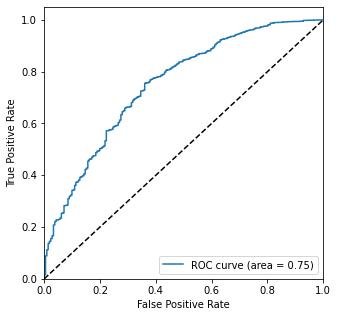

In [525]:
draw_roc(y_train_pred1_final.target, y_train_pred1_final.target_Prob)
# saturation model with all features (without selection based on IV)


In [526]:
X2=mdf2_train.drop(['target'], axis = 1)
y2=mdf2_train['target']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.7, test_size=0.3)
X2_train_sm = sm.add_constant(X2_train)
y_train_pred2 = res2.predict(X2_train_sm).values.reshape(-1)

y_train_pred2_final = pd.DataFrame({'target':y2_train.values, 'target_Prob':y_train_pred2})
y_train_pred2_final['CustID'] = y2_train.index

y_train_pred2_final.head()

,target,target_Prob,CustID
0,1,0.994420,19105
1,1,0.981364,21360
2,1,0.992456,15657
3,1,0.999779,16074
4,1,0.972328,20139


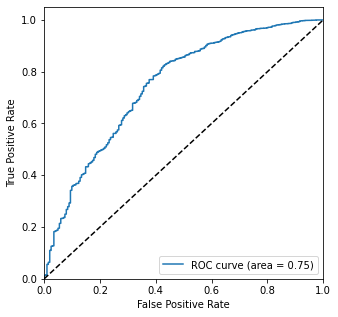

In [527]:
# fpr2, tpr2, thresholds2 = metrics.roc_curve( y_train_pred2_final.target, y_train_pred2_final.target_Prob, drop_intermediate = False )
draw_roc(y_train_pred2_final.target, y_train_pred2_final.target_Prob)

# compared with above figure, model with full feature has same performance as model after feature selection
# since they have same AUC

In [528]:
# comparison on confusion matrix
X_test_sm = sm.add_constant(X_test)
y_test_pred1 = res1.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred1)
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,target,ID,0
0,1,34945,0.995940
1,1,16581,0.992009
2,1,35864,0.983974
3,1,14277,0.998416
4,1,20914,0.991417


In [529]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Predicted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','target','Predicted_prob'], axis=1)
y_pred_final.head()

,ID,target,Predicted_prob
0,34945,1,0.995940
1,16581,1,0.992009
2,35864,1,0.983974
3,14277,1,0.998416
4,20914,1,0.991417


In [530]:
thresholds

array([2.        , 1.        , 1.        , ..., 0.45632395, 0.44549442,
       0.3194224 ])

In [531]:
y_pred_final['final_predicted'] = y_pred_final.Predicted_prob.map(lambda x: 1 if x > 0.8 else 0)
metrics.accuracy_score(y_pred_final.target, y_pred_final.final_predicted)

0.9912899211945251

In [532]:
confusionMatrix = metrics.confusion_matrix(y_pred_final.target, y_pred_final.final_predicted )

TP = confusionMatrix[1,1] 
TN = confusionMatrix[0,0] 
FP = confusionMatrix[0,1] 
FN = confusionMatrix[1,0] 

TP / float(TP+FN)



0.9995816774733319

In [533]:
TN / float(TN+FP)

0.024390243902439025

In [534]:
X2_test_sm = sm.add_constant(X2_test)
y_test_pred2 = res2.predict(X2_test_sm)
y_pred_2 = pd.DataFrame(y_test_pred2)
y_test_df2 = pd.DataFrame(y2_test)
y_test_df2['ID'] = y_test_df2.index
y_pred_2.reset_index(drop=True, inplace=True)
y_test_df2.reset_index(drop=True, inplace=True)
y_pred_final2 = pd.concat([y_test_df2, y_pred_2],axis=1)

y_pred_final2= y_pred_final2.rename(columns={ 0 : 'Predicted_prob'})

y_pred_final2 = y_pred_final2.reindex(['ID','target','Predicted_prob'], axis=1)
y_pred_final2.head()

,ID,target,Predicted_prob
0,35979,1,0.952751
1,14632,1,0.991185
2,27654,1,0.982429
3,11779,1,0.982745
4,35372,1,0.998677


In [535]:
y_pred_final2= y_pred_final2.rename(columns={ 0 : 'Predicted_prob'})
y_pred_final2 = y_pred_final2.reindex(['ID','target','Predicted_prob'], axis=1)
y_pred_final2['final_predicted'] = y_pred_final2.Predicted_prob.map(lambda x: 1 if x > 0.8 else 0)
metrics.accuracy_score(y_pred_final2.target, y_pred_final2.final_predicted)


0.990460389879718

In [536]:
confusionMatrix2 = metrics.confusion_matrix(y_pred_final2.target, y_pred_final2.final_predicted )

TP2 = confusionMatrix2[1,1] 
TN2 = confusionMatrix2[0,0] 
FP2 = confusionMatrix2[0,1] 
FN2 = confusionMatrix2[1,0] 

TP2 / float(TP2+FN2)


0.9995812833664818

In [537]:
TN2 / float(TN2+FP2)

0.03296703296703297

In [ ]:
# by selecting threshold 0.8, based on accuracy score and recall rate
# saturation model and model after IV selection have same performance in total accuracy and recall rate
# although model has high recall rate, the poor performance in specificity showed models are not good at identify negative sample
# one way to increase specificity rate maybe increase threshold (larger than 0.9), with a decrease of recall as cost